# Выпускной проект
## Разработка предиктивной модели для прогнозирования температуры стали при выплавке

### Металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.


# I Знакомство и входной анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Данные об электродах(нагреве)

In [2]:
row_data=pd.read_csv('final_steel/data_arc.csv')

`data_temp.csv` — результаты измерения температуры;

In [3]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [4]:
row_data.head(5)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


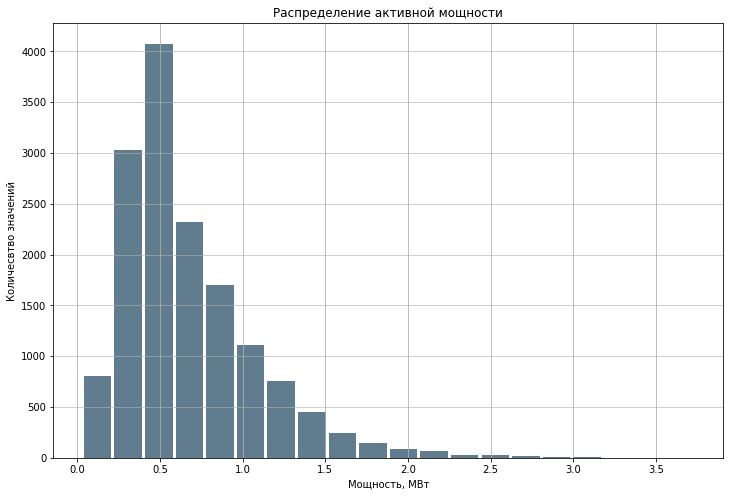

In [5]:
row_data['Активная мощность'].plot.hist(grid=True, bins=20, rwidth=0.9,figsize=(12,8),
                   color='#607c8e')
plt.title('Распределение активной мощности')
plt.xlabel('Мощность, МВт')
plt.ylabel('Количесвтво значений')


plt.grid(axis='y', alpha=0.75)

In [6]:
tmp_data = pd.read_csv('final_steel/data_temp.csv')

In [7]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


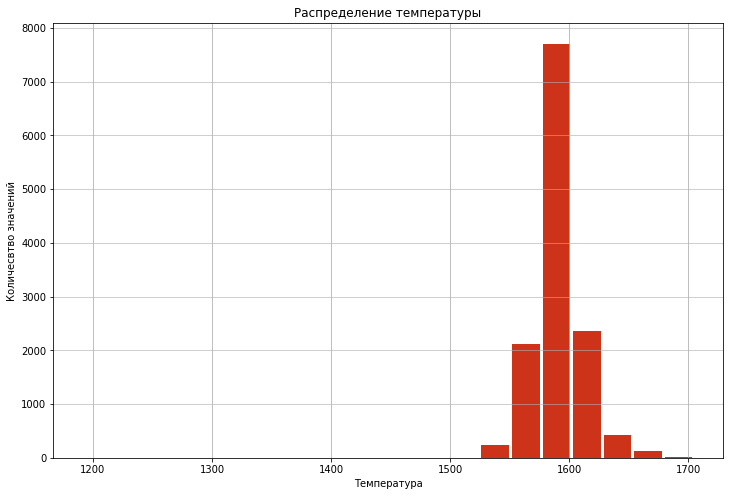

In [8]:
tmp_data['Температура'].plot.hist(grid=True, bins=20, rwidth=0.9,figsize=(12,8),
                   color='#cc3319')
plt.title('Распределение температуры')
plt.xlabel('Температура')
plt.ylabel('Количесвтво значений')


plt.grid(axis='y', alpha=0.75)

In [9]:
print('Максимальная температура', tmp_data['Температура'].max())

Максимальная температура 1705.0


In [10]:
print('Минимальная температура', tmp_data['Температура'].min())

Минимальная температура 1191.0


In [11]:
tmp_data['Время замера'].max()

'2019-09-01 04:38:08'

Данные о подаче сыпучих материалов

In [12]:
data_bulk=pd.read_csv('final_steel/data_bulk.csv')

In [13]:
data_bulk_time=pd.read_csv('final_steel/data_bulk_time.csv')

In [14]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [15]:
data_bulk.head(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Text(33.0, 0.5, 'Количество значений')

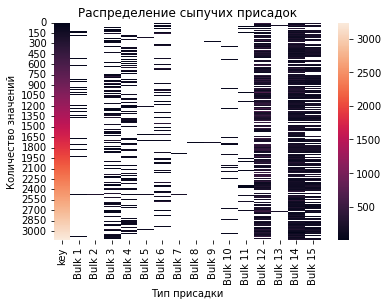

In [16]:
sns.heatmap(data_bulk)
plt.title('Распределение сыпучих присадок')
plt.xlabel('Тип присадки')
plt.ylabel('Количество значений')


In [17]:
data_bulk_time.head(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Данные о продувке сплава газом;


In [18]:
data_gas=pd.read_csv('final_steel/data_gas.csv')

In [19]:
data_gas.head(5)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


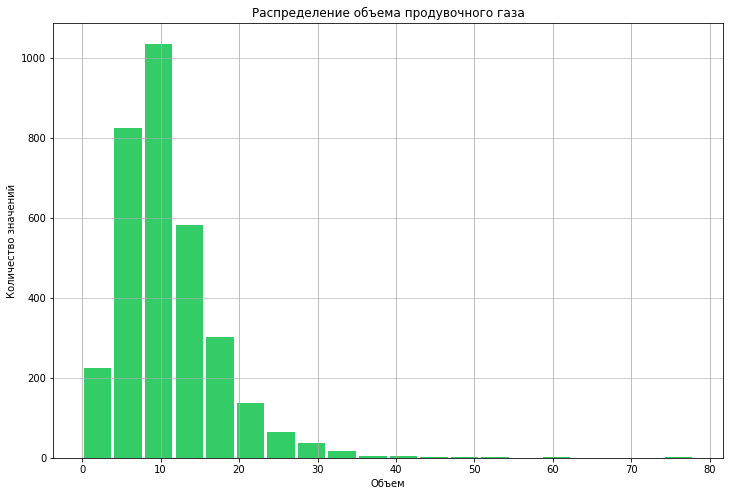

In [20]:
data_gas['Газ 1'].plot.hist(grid=True, bins=20, rwidth=0.9,figsize=(12,8),
                   color='#33cc66')
plt.title('Распределение объема продувочного газа')
plt.xlabel('Объем')
plt.ylabel('Количество значений')


plt.grid(axis='y', alpha=0.75)


Данные о проволочных материалах


In [21]:
data_wire=pd.read_csv('final_steel/data_wire.csv')

In [22]:
data_wire_time=pd.read_csv('final_steel/data_wire_time.csv')

In [23]:
data_wire.head(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [25]:
row_data['key'].unique()

array([   1,    2,    3, ..., 3239, 3240, 3241])

### Предварительные выводы по входному анализу данных

Представленные данные агрегируют параметры процессов для выплавки 3241 заготовки. Данные о временни представлены в формате object, а не datetime. В данных присутствуют как выбросы, так и не по всем заготовкам они представлены в полном объеме. Для создания максимально корректных признаков необходима предобработка и подготовка данных, например вычисление полной мощности на электродах, удаление выбросов, мастшабирование.

## Визуализируем процесс для одной из выплавок

In [26]:
key=10 # номер выплавки
row_data1=row_data[row_data['key']==key]
row_data1['Начало нагрева дугой'] = pd.to_datetime(row_data1['Начало нагрева дугой'])
row_data1['Конец нагрева дугой'] = pd.to_datetime(row_data1['Конец нагрева дугой'])
row_data1['capacity'] = (row_data1['Активная мощность']**2 + row_data1['Активная мощность']**2)**0.5
row_data1 = row_data1.drop(['Активная мощность','Реактивная мощность','key'],axis=1)
zero_start = pd.Series(row_data1['Конец нагрева дугой'][0:-1]+datetime.timedelta(seconds=1)).reset_index(0,drop=True)
zero_end = pd.Series(row_data1['Начало нагрева дугой'][1:]-datetime.timedelta(seconds=1)).reset_index(0,drop=True)
d={'Начало нагрева дугой':zero_start,'Конец нагрева дугой':zero_end,'capacity':0}
zero_heat = pd.DataFrame(d)
zero_heat

,Начало нагрева дугой,Конец нагрева дугой,capacity
0,2019-05-03 16:13:36,2019-05-03 16:14:57,0
1,2019-05-03 16:19:16,2019-05-03 16:21:37,0
2,2019-05-03 16:23:49,2019-05-03 16:25:04,0
3,2019-05-03 16:26:41,2019-05-03 16:29:23,0
4,2019-05-03 16:31:09,2019-05-03 16:33:17,0


<AxesSubplot: xlabel='Время замера'>

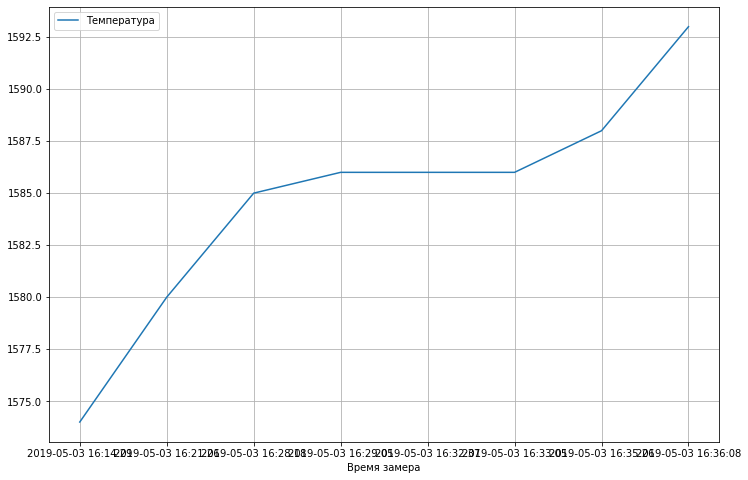

In [27]:
tt = row_data1.append(zero_heat, ignore_index = True )
data1 = tmp_data[tmp_data['key']==key]
data1.plot(x='Время замера',y='Температура', figsize = (12,8), grid=True)

In [28]:
wire_time = data_wire_time[data_wire_time['key']==key]
wire_time = wire_time.dropna(axis=1)
wt=wire_time.T
wt['wire'] = wt.index
wt['time'] = wt[key-1].values
wt = wt.drop(index= 'key' )
wt = wt.drop(wt.columns[0],axis=1)
wt.reset_index(drop= True,inplace= True)
wt['time'] = pd.to_datetime(wt['time'])
bulk_time = data_bulk_time[data_bulk_time['key']==key]
bulk_time = bulk_time.dropna(axis=1)
bt = bulk_time.T
bt['bulk'] = bt.index
bt['time'] = bt[key-1].values
bt = bt.drop(index= 'key' )
bt = bt.drop(bt.columns[0],axis=1)
bt.reset_index(drop= True,inplace= True)
bt['time'] = pd.to_datetime(bt['time'])
data1['time'] = pd.to_datetime(data1['Время замера'])
data1=data1.drop('Время замера', axis=1)
bt = bt.append(data1, ignore_index = True )
heat = pd.DataFrame()
no_heat = pd.DataFrame()
heat['time'] = tt['Начало нагрева дугой']
heat['capacity'] = tt['capacity']
no_heat['time'] = tt['Конец нагрева дугой']
no_heat['capacity'] = tt['capacity']
bt = bt.append(heat, ignore_index = True )
bt = bt.append(no_heat, ignore_index = True )
bt = bt.append(wt,ignore_index = True)
bt.loc[bt['bulk'].isna()!=1,'bulk'] = 4
bt.loc[bt['wire'].isna()!=1,'wire'] = 6
bt = bt.sort_values(by='time')
bt['capacity'].fillna(method='ffill',inplace=True)

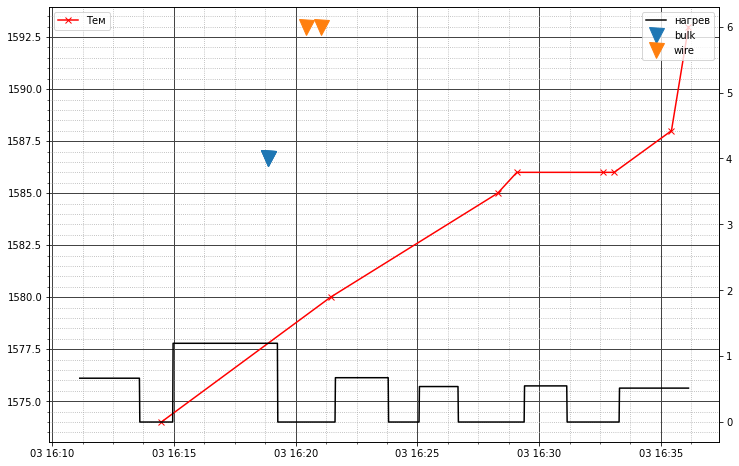

In [29]:
fig = plt.figure(figsize = (12,8))
ax = plt.subplot(111)

ax.plot(data1['time'], data1['Температура'], 'x-r', label='Тем')  

ax2 = ax.twinx()
ax2.plot(bt['time'], bt['capacity'],'-k', label='нагрев') 
ax2.plot(bt['time'], bt['bulk'],'v', markersize=15,label='bulk') 
ax2.plot(bt['time'], bt['wire'],'v',markersize=15, label='wire') 

ax.minorticks_on()

#plt.plot(bt['time'], 1, label='bulk')
ax.grid(which='major',color='#444',linewidth=1)
ax.grid(which='minor',color='#aaa',ls=':')

ax.legend()
ax2.legend()
plt.show()

In [30]:
tmp_data.groupby('key')['Температура'].nth(-1).min()

1541.0

In [31]:
tmp_data.groupby('key')['Температура'].nth(-1).max()

1700.0

Приведенная выше диаграмма позволяет наглядно понять технологический процесс.

## Формулировка задачи

<b>Исходя из поставленной цели, основной задачей проекта будет создание модели, которая в зависимости от параметров процесса(исходной температуры, времени и мощности нагрева,  количества и типа дозирования легирующих присадок, расхода инертного газа) спрогнозирует температуру выплавки в конце процесса.</b>

## План работ

1. Предобработка данных

1.1 Удаление выбросов

1.2 Преведение в соответствие названий параметров и их типов данных

1.3 Удаление/заполенение пропущенных значений  
2. Подготовка признаков. Создание обучающей, валидационной и тестовой выборок

2.1 Выбор релеватных датасетов

2.2 Создание единой таблицы признаки+таргет

2.3 Масштабирование признаков

2.4 Формирование обучающей, валидационной и тестовой выборок  
3. Создание и обучение нескольких моделей

3.1 Выбор моделей

3.2 Выбор и обоснование метрики качества

3.3 Обучение моделей и оценка их эффективности на базовых гиперпараметрах  
4. Кросс валидация,подбор гиперпараметров для достижения требуемой метрики  
5. Финальное тестирование выбранной модели


# <b> II Основная часть </b>

### 1.Предобработка данных

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime
import numpy as np
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor


In [34]:
row_data=pd.read_csv('final_steel/data_arc.csv')
tmp_data = pd.read_csv('final_steel/data_temp.csv')
data_bulk=pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time=pd.read_csv('final_steel/data_bulk_time.csv')
data_gas=pd.read_csv('final_steel/data_gas.csv')
data_wire=pd.read_csv('final_steel/data_wire.csv')
data_wire_time=pd.read_csv('final_steel/data_wire_time.csv')

### 1.1 Удаление выбросов

In [35]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


<AxesSubplot: >

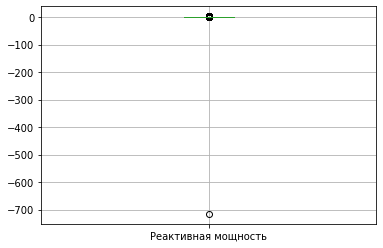

In [36]:
row_data.boxplot('Реактивная мощность')

In [37]:
i = row_data[row_data['Реактивная мощность']<0].index

In [38]:
row_data.loc[i]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


In [39]:
row_data.loc[row_data['key']==2116]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


In [40]:
row_data=row_data[row_data['key']!=2116]

In [41]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14872 non-null  int64  
 1   Начало нагрева дугой  14872 non-null  object 
 2   Конец нагрева дугой   14872 non-null  object 
 3   Активная мощность     14872 non-null  float64
 4   Реактивная мощность   14872 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 697.1+ KB


<AxesSubplot: >

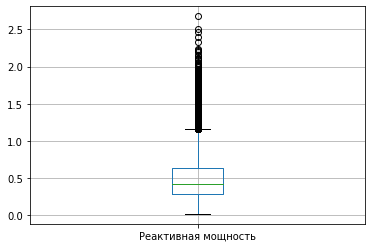

In [42]:
row_data.boxplot('Реактивная мощность')

In [43]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [44]:
tmp_data = tmp_data.dropna()

In [45]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13006 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           13006 non-null  int64  
 1   Время замера  13006 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 406.4+ KB


<AxesSubplot: >

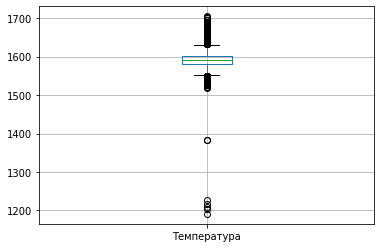

In [46]:
tmp_data.boxplot('Температура')

In [47]:
to_drop = tmp_data['key'].loc[tmp_data['Температура']<1500].values

In [48]:
tmp_data = tmp_data.loc[~tmp_data['key'].isin(to_drop)]

In [49]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12961 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           12961 non-null  int64  
 1   Время замера  12961 non-null  object 
 2   Температура   12961 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 405.0+ KB


In [50]:
data_bulk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [51]:
data_bulk = data_bulk.drop(['Bulk 1','Bulk 2','Bulk 5','Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11','Bulk 13'],axis=1)

In [52]:
data_bulk.fillna(0,inplace=True)

In [53]:
data_bulk

,key,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
0,1,0.0,43.0,206.0,150.0,154.0
1,2,0.0,73.0,206.0,149.0,154.0
2,3,0.0,34.0,205.0,152.0,153.0
3,4,0.0,81.0,207.0,153.0,154.0
4,5,0.0,78.0,203.0,151.0,152.0
...,...,...,...,...,...,...
3124,3237,170.0,0.0,252.0,130.0,206.0
3125,3238,126.0,0.0,254.0,108.0,106.0
3126,3239,0.0,0.0,158.0,270.0,88.0
3127,3240,0.0,0.0,0.0,192.0,54.0


In [54]:
data_bulk_time = data_bulk_time.drop(['Bulk 1','Bulk 2','Bulk 5','Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11','Bulk 13'],axis=1)

<AxesSubplot: >

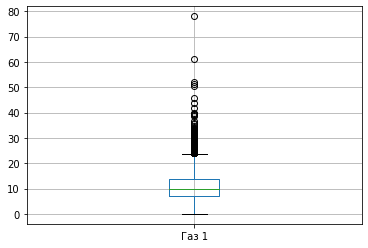

In [55]:
data_gas.boxplot('Газ 1')

In [56]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [57]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [58]:
data_wire = data_wire.drop(['Wire 3','Wire 4','Wire 5','Wire 6','Wire 7','Wire 8','Wire 9'],axis=1)

In [59]:
data_wire.fillna(0,inplace=True)

In [60]:
data_wire

,key,Wire 1,Wire 2
0,1,60.059998,0.00000
1,2,96.052315,0.00000
2,3,91.160157,0.00000
3,4,89.063515,0.00000
4,5,89.238236,9.11456
...,...,...,...
3076,3237,38.088959,0.00000
3077,3238,56.128799,0.00000
3078,3239,143.357761,0.00000
3079,3240,34.070400,0.00000


### 1.2 Подготовка релевантных выборок данных

In [61]:
tmp_data.groupby('key').agg('count')

,Время замера,Температура
key,,
1,5,5
2,6,6
3,5,5
4,3,3
5,2,2
...,...,...
3237,1,1
3238,1,1
3239,1,1


In [62]:
df_out = tmp_data.groupby('key').count()<2

In [63]:
df_out[df_out['Время замера']==False]

,Время замера,Температура
key,,
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
2495,False,False
2496,False,False
2497,False,False


In [64]:
to_drop = df_out[df_out['Температура']].index

In [65]:
to_drop.max()

3241

In [66]:
to_drop.min()

195

In [67]:
to_drop.size

740

In [68]:
tmp_data = tmp_data.loc[~tmp_data['key'].isin(to_drop)]

In [69]:
#for x in to_drop:
 #   i = tmp_data[tmp_data['key']==x].index
  #  tt = tt.drop(index=i)

In [70]:
good_keys = tmp_data.groupby('key').count().index

In [71]:
good_keys

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2489, 2490, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499],
           dtype='int64', name='key', length=2470)

In [72]:
tmp_data.groupby('key').agg('count')

,Время замера,Температура
key,,
1,5,5
2,6,6
3,5,5
4,3,3
5,2,2
...,...,...
2495,3,3
2496,4,4
2497,2,2


### 2 Подготовка итогового датасета

### 2.1 Выберем необходимые данные

Выберем начальную и конечные температуры

In [73]:
init_temp = tmp_data.groupby('key')['Температура','Время замера'].nth(0)

In [74]:
#tmp1=tt.groupby('key')['Температура','Время замера'].nth(1)
#tmp2=tt.groupby('key')['Температура','Время замера'].nth(2)

In [75]:
end_temp = tmp_data.groupby('key')['Температура','Время замера'].nth(-1)

In [76]:
init_temp

,Температура,Время замера
key,,
1,1571.0,2019-05-03 11:16:18
2,1581.0,2019-05-03 11:37:27
3,1596.0,2019-05-03 12:13:17
4,1601.0,2019-05-03 12:52:57
5,1576.0,2019-05-03 13:23:19
...,...,...
2495,1570.0,2019-08-06 00:35:45
2496,1554.0,2019-08-06 01:02:54
2497,1571.0,2019-08-06 01:41:53


In [77]:
end_temp

,Температура,Время замера
key,,
1,1613.0,2019-05-03 11:30:39
2,1602.0,2019-05-03 11:59:12
3,1599.0,2019-05-03 12:34:57
4,1625.0,2019-05-03 12:59:25
5,1602.0,2019-05-03 13:36:01
...,...,...
2495,1591.0,2019-08-06 00:54:42
2496,1591.0,2019-08-06 01:29:52
2497,1589.0,2019-08-06 01:53:50


In [78]:
init_temp['Температура1'] =end_temp['Температура']
init_temp['Время замера1'] =end_temp['Время замера']

In [79]:
#init_temp['Температура2']=tmp1['Температура']
#init_temp['Температура3']=tmp2['Температура']

In [80]:
#ttt=row_data
init_temp

,Температура,Время замера,Температура1,Время замера1
key,,,,
1,1571.0,2019-05-03 11:16:18,1613.0,2019-05-03 11:30:39
2,1581.0,2019-05-03 11:37:27,1602.0,2019-05-03 11:59:12
3,1596.0,2019-05-03 12:13:17,1599.0,2019-05-03 12:34:57
4,1601.0,2019-05-03 12:52:57,1625.0,2019-05-03 12:59:25
5,1576.0,2019-05-03 13:23:19,1602.0,2019-05-03 13:36:01
...,...,...,...,...
2495,1570.0,2019-08-06 00:35:45,1591.0,2019-08-06 00:54:42
2496,1554.0,2019-08-06 01:02:54,1591.0,2019-08-06 01:29:52
2497,1571.0,2019-08-06 01:41:53,1589.0,2019-08-06 01:53:50


In [81]:
row_data = row_data.loc[row_data['key'].isin(good_keys)]

Оставим данные только по выбранным ранее выплавкам

Вычислим время нагрева

In [83]:
row_data['time1'] = pd.to_datetime(row_data['Начало нагрева дугой'])

In [84]:
row_data['time2'] = pd.to_datetime(row_data['Конец нагрева дугой'])

In [85]:
row_data['heat_time'] = (row_data['time2']-row_data['time1']).dt.total_seconds()

In [86]:
row_data

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,time1,time2,heat_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,2019-05-03 11:02:14,2019-05-03 11:06:02,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,2019-05-03 11:07:28,2019-05-03 11:10:33,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,2019-05-03 11:11:44,2019-05-03 11:14:36,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,2019-05-03 11:18:14,2019-05-03 11:24:19,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,2019-05-03 11:26:09,2019-05-03 11:28:37,148.0
...,...,...,...,...,...,...,...,...
11444,2498,2019-08-06 02:19:43,2019-08-06 02:20:24,0.180213,0.116065,2019-08-06 02:19:43,2019-08-06 02:20:24,41.0
11445,2499,2019-08-06 02:32:56,2019-08-06 02:38:08,1.425867,1.043338,2019-08-06 02:32:56,2019-08-06 02:38:08,312.0
11446,2499,2019-08-06 02:41:09,2019-08-06 02:44:34,0.978407,0.627803,2019-08-06 02:41:09,2019-08-06 02:44:34,205.0
11447,2499,2019-08-06 02:46:03,2019-08-06 02:50:58,1.381264,0.894252,2019-08-06 02:46:03,2019-08-06 02:50:58,295.0


Вычислим полную мощность при нагреве

In [87]:
row_data['power'] = (row_data['Активная мощность']**2+row_data['Реактивная мощность']**2)**0.5

Вычислим количество энергии, переданное во время нагрева всей выплавки

In [88]:
row_data['kwh'] = row_data['power']*1000*row_data['heat_time']/3600

In [89]:
row_data

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,time1,time2,heat_time,power,kwh
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,2019-05-03 11:02:14,2019-05-03 11:06:02,228.0,1.193639,75.597154
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,2019-05-03 11:07:28,2019-05-03 11:10:33,185.0,0.959010,49.282440
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,2019-05-03 11:11:44,2019-05-03 11:14:36,172.0,0.896038,42.810695
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,2019-05-03 11:18:14,2019-05-03 11:24:19,365.0,1.970470,199.783720
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,2019-05-03 11:26:09,2019-05-03 11:28:37,148.0,0.807239,33.186477
...,...,...,...,...,...,...,...,...,...,...
11444,2498,2019-08-06 02:19:43,2019-08-06 02:20:24,0.180213,0.116065,2019-08-06 02:19:43,2019-08-06 02:20:24,41.0,0.214355,2.441261
11445,2499,2019-08-06 02:32:56,2019-08-06 02:38:08,1.425867,1.043338,2019-08-06 02:32:56,2019-08-06 02:38:08,312.0,1.766819,153.124347
11446,2499,2019-08-06 02:41:09,2019-08-06 02:44:34,0.978407,0.627803,2019-08-06 02:41:09,2019-08-06 02:44:34,205.0,1.162504,66.198154
11447,2499,2019-08-06 02:46:03,2019-08-06 02:50:58,1.381264,0.894252,2019-08-06 02:46:03,2019-08-06 02:50:58,295.0,1.645472,134.837275


In [90]:
final_heat_data = row_data[['key','heat_time','kwh']].groupby('key').sum()

In [91]:
swap = row_data.groupby('key').mean()

In [92]:
final_heat_data['power']=swap['power']

In [93]:
final_heat_data

,heat_time,kwh,power
key,,,
1,1098.0,400.660487,1.165279
2,811.0,244.787101,0.912304
3,655.0,145.851882,0.597907
4,741.0,221.364253,0.953741
5,869.0,333.093877,1.008939
...,...,...,...
2495,723.0,216.338398,0.996717
2496,940.0,243.128172,0.842839
2497,569.0,154.702875,0.961672


Добавим данные по температуре

In [94]:
final_heat_data[['init_temp','final_temp']] = init_temp[['Температура','Температура1']]

In [95]:
#final_heat_data.reset_index(drop=True,inplace=True)

In [96]:
final_heat_data

,heat_time,kwh,power,init_temp,final_temp
key,,,,,
1,1098.0,400.660487,1.165279,1571.0,1613.0
2,811.0,244.787101,0.912304,1581.0,1602.0
3,655.0,145.851882,0.597907,1596.0,1599.0
4,741.0,221.364253,0.953741,1601.0,1625.0
5,869.0,333.093877,1.008939,1576.0,1602.0
...,...,...,...,...,...
2495,723.0,216.338398,0.996717,1570.0,1591.0
2496,940.0,243.128172,0.842839,1554.0,1591.0
2497,569.0,154.702875,0.961672,1571.0,1589.0


In [97]:
data_gas = data_gas.loc[data_gas['key'].isin(good_keys)]

In [98]:
data_gas

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
2492,2495,7.125735
2493,2496,9.412616
2494,2497,6.271699
2495,2498,14.953657


Добавим данные по продувке газом

In [99]:
final_heat_data=final_heat_data.merge(data_gas, how='inner', left_on='key', right_on='key')


Добавим данные по проволочным добавкам 

In [100]:
data_wire = data_wire.loc[data_wire['key'].isin(good_keys)]

In [101]:
final_heat_data=final_heat_data.merge(data_wire, how='inner', left_on='key', right_on='key')


добавим данные по сыпучим добавкам

In [102]:
data_bulk = data_bulk.loc[data_bulk['key'].isin(good_keys)]

In [103]:
final_heat_data=final_heat_data.merge(data_bulk, how='inner', left_on='key', right_on='key')

In [104]:
final_heat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2324 non-null   int64  
 1   heat_time   2324 non-null   float64
 2   kwh         2324 non-null   float64
 3   power       2324 non-null   float64
 4   init_temp   2324 non-null   float64
 5   final_temp  2324 non-null   float64
 6   Газ 1       2324 non-null   float64
 7   Wire 1      2324 non-null   float64
 8   Wire 2      2324 non-null   float64
 9   Bulk 3      2324 non-null   float64
 10  Bulk 4      2324 non-null   float64
 11  Bulk 12     2324 non-null   float64
 12  Bulk 14     2324 non-null   float64
 13  Bulk 15     2324 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 272.3 KB


In [105]:
final_heat_data.drop('key',axis =1,inplace=True)

Заполним нулями недостающие значения

In [106]:
#dat.fillna(0,inplace=True)
data = final_heat_data

Финальный датасет готов

In [107]:
#data = final_heat_data

In [108]:
data

,heat_time,kwh,power,init_temp,final_temp,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
0,1098.0,400.660487,1.165279,1571.0,1613.0,29.749986,60.059998,0.00000,0.0,43.0,206.0,150.0,154.0
1,811.0,244.787101,0.912304,1581.0,1602.0,12.555561,96.052315,0.00000,0.0,73.0,206.0,149.0,154.0
2,655.0,145.851882,0.597907,1596.0,1599.0,28.554793,91.160157,0.00000,0.0,34.0,205.0,152.0,153.0
3,741.0,221.364253,0.953741,1601.0,1625.0,18.841219,89.063515,0.00000,0.0,81.0,207.0,153.0,154.0
4,869.0,333.093877,1.008939,1576.0,1602.0,5.413692,89.238236,9.11456,0.0,78.0,203.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,723.0,216.338398,0.996717,1570.0,1591.0,7.125735,89.150879,0.00000,21.0,0.0,256.0,129.0,223.0
2320,940.0,243.128172,0.842839,1554.0,1591.0,9.412616,114.179527,0.00000,0.0,63.0,256.0,129.0,226.0
2321,569.0,154.702875,0.961672,1571.0,1589.0,6.271699,94.086723,9.04800,0.0,85.0,230.0,124.0,226.0
2322,750.0,213.282721,0.828750,1591.0,1594.0,14.953657,118.110717,0.00000,90.0,0.0,206.0,129.0,207.0


### 2.2 Формирование обучающей, тестовой выборок

In [109]:
# Подготовим данные - криториальный параметр final_temp является целью прогноза
features = data.drop(['final_temp'], axis = 1) 
target = data['final_temp']

train_set_ft,test_set_ft,train_set_tg, test_set_tg = train_test_split(features,target, test_size=0.25, random_state = 16012023)

#Выведем для проверки размеры выборок
print('Обучающие данные: ',train_set_ft.shape)
print('Обучающие цели: ',train_set_tg.shape)

print('тестовые данные: ', test_set_ft.shape)
print('тестовые цели: ', test_set_tg.shape)

Обучающие данные:  (1743, 12)
Обучающие цели:  (1743,)
тестовые данные:  (581, 12)
тестовые цели:  (581,)


## 3 Обучение моделей

In [111]:


#model.fit(train_set_ft,train_set_tg)

#predict = model.predict(test_set_ft)

#mean_absolute_error(test_set_tg,predict)

In [112]:
def mae(target, predict):
    score = mean_absolute_error(target, predict)

    return score


mae_score = make_scorer(mae,greater_is_better=False)

In [113]:
model = LinearRegression()
cross_val_score(model,train_set_ft, train_set_tg,scoring='neg_mean_absolute_error' , cv=3)

array([-6.70058092, -6.52584493, -6.53901   ])

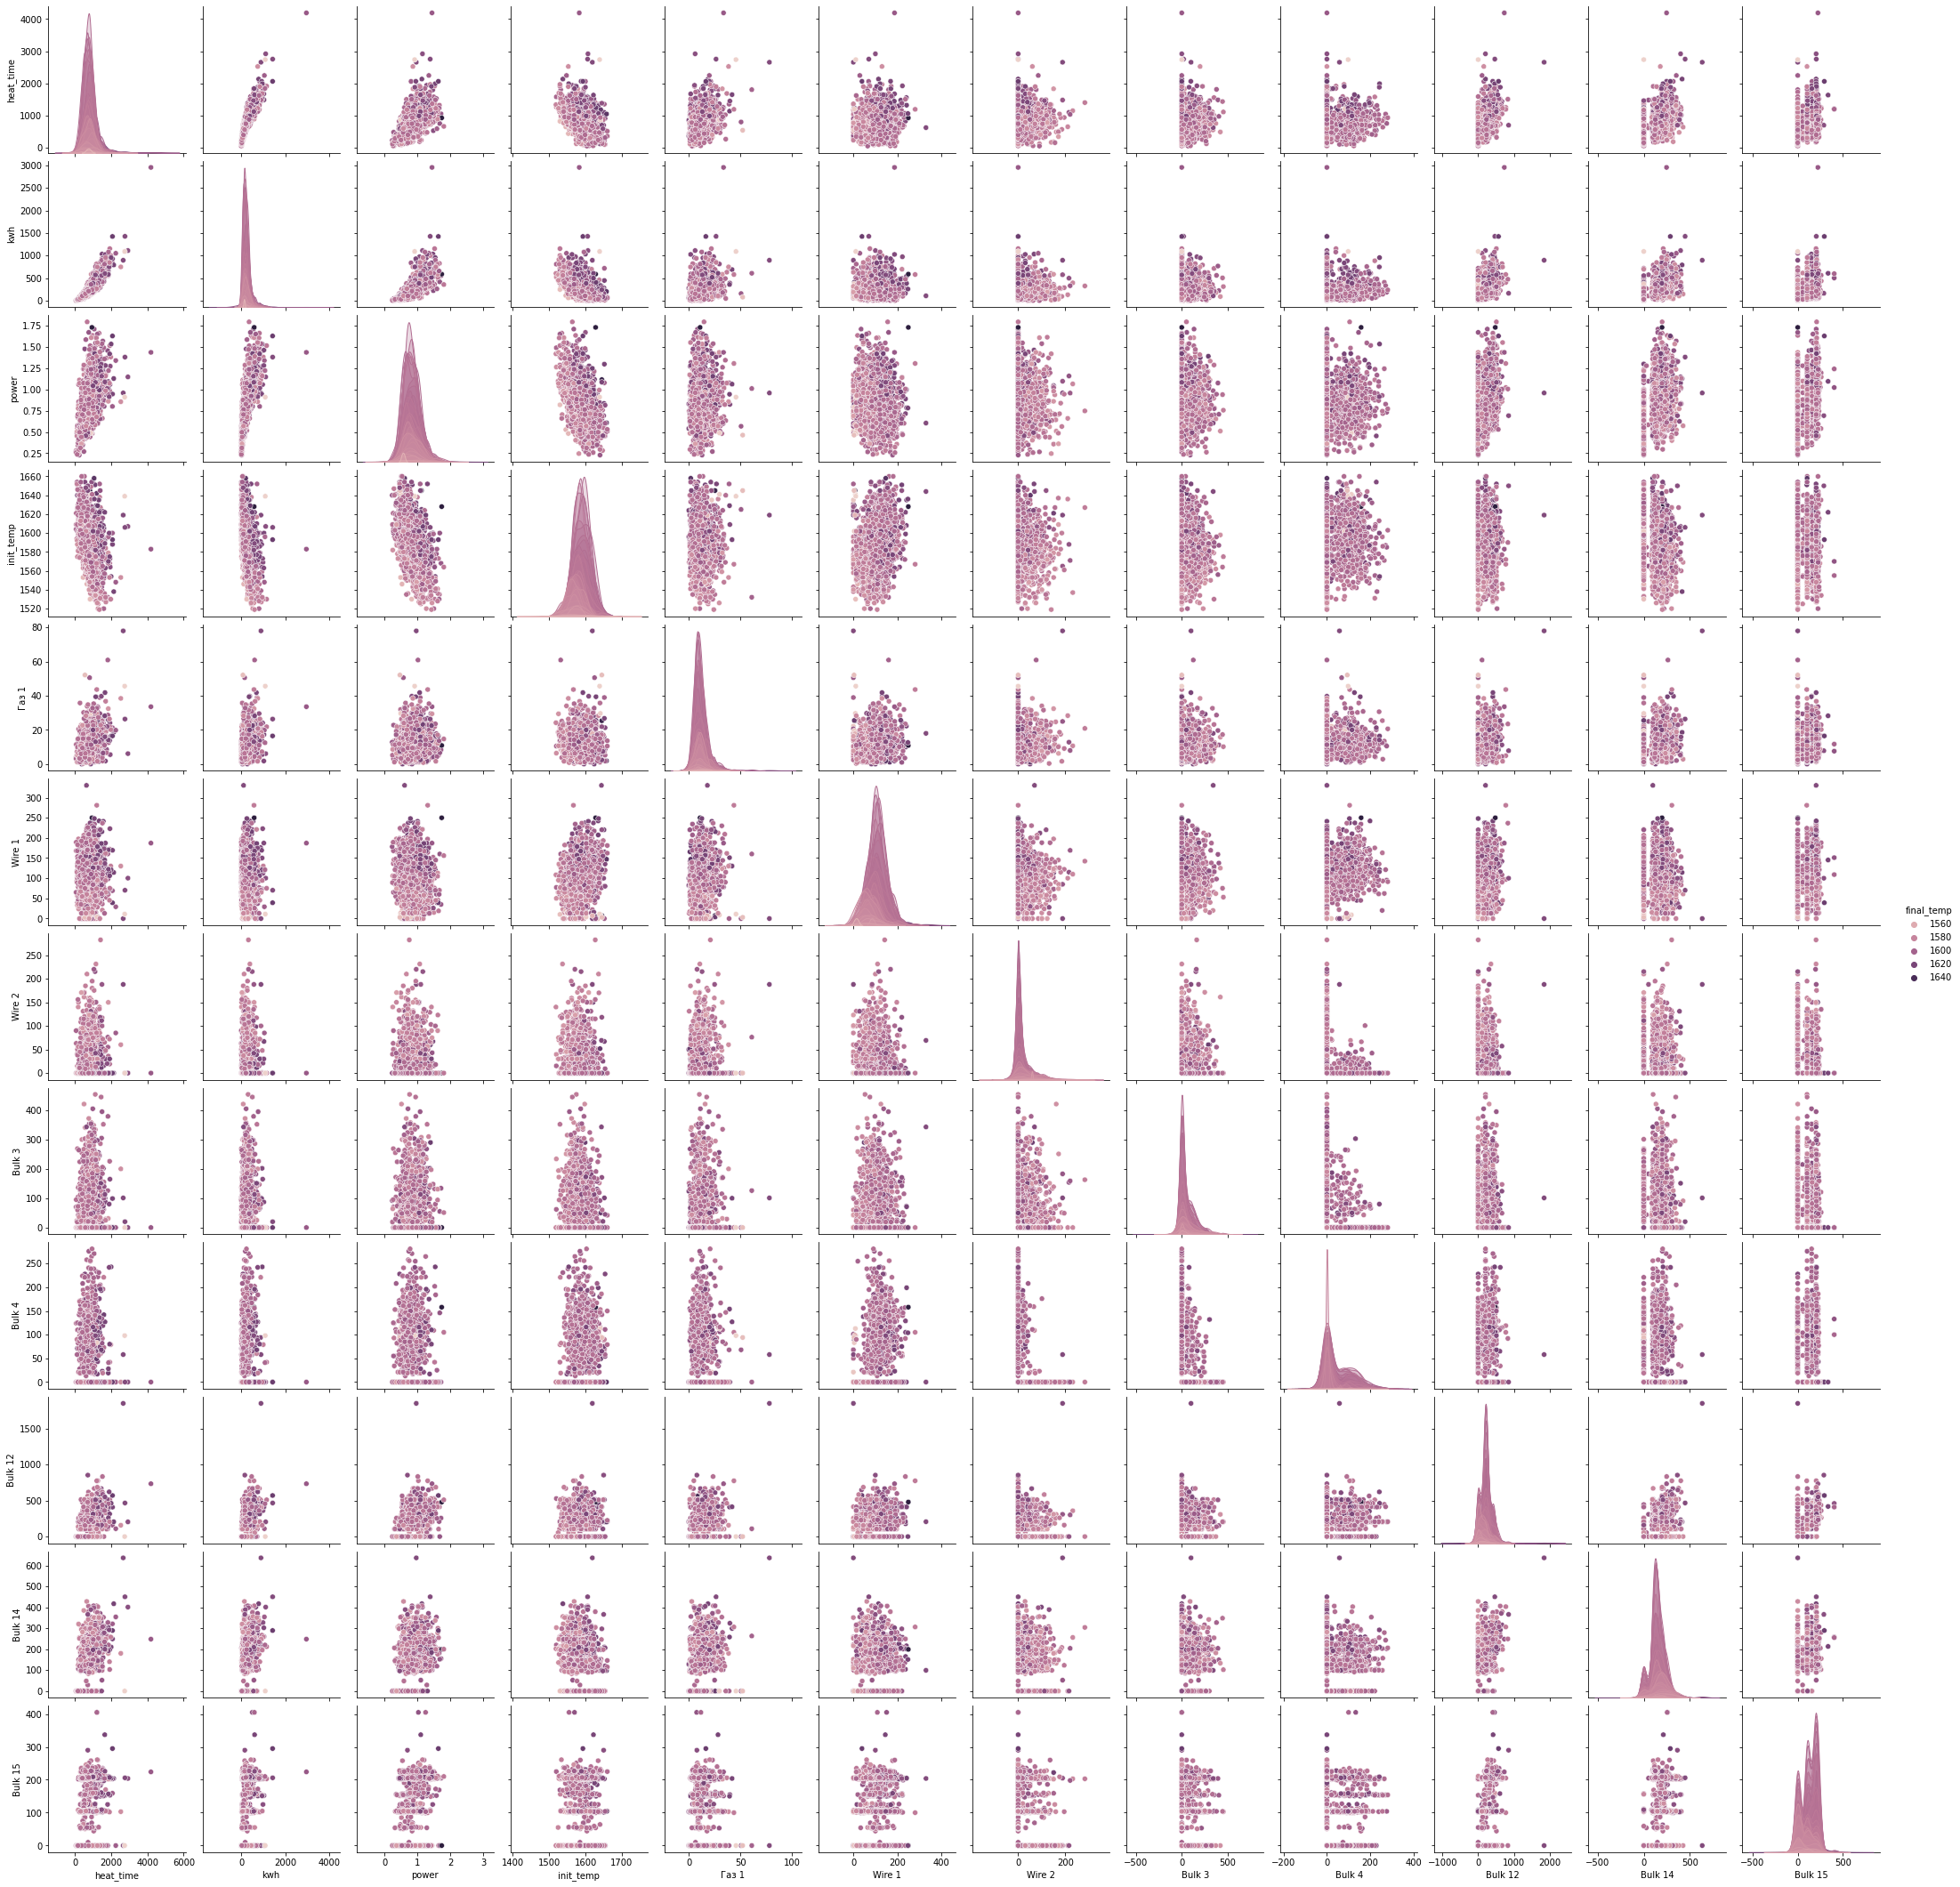

In [114]:
sns.pairplot(data, hue="final_temp")

In [115]:
data.corr()

,heat_time,kwh,power,init_temp,final_temp,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
heat_time,1.000000,0.900164,0.568196,-0.383939,0.277953,0.396207,0.055443,0.054460,0.091603,-0.029086,0.466002,0.461035,0.294538
kwh,0.900164,1.000000,0.729114,-0.416027,0.274535,0.318929,0.006195,0.015829,0.061889,-0.035913,0.479666,0.440723,0.308601
power,0.568196,0.729114,1.000000,-0.505129,0.190470,0.089535,-0.113451,-0.010184,0.036024,-0.043713,0.391922,0.340354,0.329482
init_temp,-0.383939,-0.416027,-0.505129,1.000000,0.301882,0.036736,0.262880,-0.101101,-0.113380,0.165484,-0.079574,-0.179991,-0.062382
final_temp,0.277953,0.274535,0.190470,0.301882,1.000000,0.059079,0.317488,-0.207242,-0.037156,0.187817,0.266805,0.114893,0.265772
Газ 1,0.396207,0.318929,0.089535,0.036736,0.059079,1.000000,0.118192,0.104653,0.059665,0.017532,0.216969,0.268284,0.043033
Wire 1,0.055443,0.006195,-0.113451,0.262880,0.317488,0.118192,1.000000,-0.069439,0.037788,0.298145,0.170812,-0.052654,0.119047
Wire 2,0.054460,0.015829,-0.010184,-0.101101,-0.207242,0.104653,-0.069439,1.000000,0.094897,-0.268115,-0.098208,0.037017,-0.096411
Bulk 3,0.091603,0.061889,0.036024,-0.113380,-0.037156,0.059665,0.037788,0.094897,1.000000,-0.295526,0.018059,0.011209,-0.013181
Bulk 4,-0.029086,-0.035913,-0.043713,0.165484,0.187817,0.017532,0.298145,-0.268115,-0.295526,1.000000,0.105190,-0.091103,0.100833


Исходя из таблицы коэффициентов корреляции, для исключения мультиколлелярции стоит либо оставить что-то одно из трех - heat_time ,kwh либо power.

In [116]:
features = data.drop(['final_temp','heat_time','power'], axis = 1) 
target = data['final_temp']
train_set_ft,test_set_ft,train_set_tg, test_set_tg = train_test_split(features,target, test_size=0.25, random_state = 16012023)


In [117]:
model = LinearRegression()
cross_val_score(model,train_set_ft, train_set_tg,scoring='neg_mean_absolute_error' , cv=3)

array([-6.74190565, -6.72183089, -6.6404811 ])

In [118]:
model = DecisionTreeRegressor(max_depth=6, random_state = 16012023)
cross_val_score(model,train_set_ft, train_set_tg,scoring='neg_mean_absolute_error' , cv=3)

array([-7.88368935, -8.04393167, -7.41414982])

In [119]:
parametrs = { 'n_estimators': range (10, 150, 10),
              'max_depth': range (1,20, 5) }
model = RandomForestRegressor(random_state=16012023)
grid = GridSearchCV(model,parametrs, verbose = 1,scoring='neg_mean_absolute_error',cv = 5)
grid.fit(train_set_ft, train_set_tg)
#grid.best_params_
grid.best_score_


Fitting 5 folds for each of 56 candidates, totalling 280 fits


-6.452503121432758

Модель LGBMRegressor

In [120]:
#modelLGBM = LGBMRegressor(num_leaves=3, max_depth=5,n_estimators=85,random_state=16012023)
#modelLGBM.fit(train_set_ft,train_set_tg)
#LGBM_predict = modelLGBM.predict(test_set_ft)
#mean_absolute_error(test_set_tg,LGBM_predict)





In [121]:
params = {
    'num_leaves': [7, 14, 21],
    'max_depth': [1, 3, 5],
    'n_estimators': [10, 150,10]
}
model = LGBMRegressor(random_state=16012023)
grid = GridSearchCV(model, params,scoring='neg_mean_absolute_error',cv = 5)
grid.fit(train_set_ft,train_set_tg)
grid.best_score_

-6.5116253815194

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
params= {
    'max_depth': [1, 3, 5],
    'n_estimators': [10, 150,10]
}
gradient_boosted = GradientBoostingRegressor(random_state=16012023)
grid = GridSearchCV(gradient_boosted,params,scoring='neg_mean_absolute_error',cv = 5)
grid.fit(train_set_ft,train_set_tg)
grid.best_score_
#gradient_boosted.fit(train_set_ft, train_set_tg)
#predict_b = gradient_boosted.predict(test_set_ft)
#mean_absolute_error(test_set_tg,predict_b)


-6.500356029549219

In [134]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 150}

In [124]:
from catboost import CatBoostRegressor


In [125]:

model = CatBoostRegressor(depth=7,l2_leaf_reg=8,learning_rate=0.3, random_state=16012023)

model.fit(train_set_ft,train_set_tg)
predict = model.predict(test_set_ft)

mean_absolute_error(test_set_tg,predict)

0:	learn: 10.6601227	total: 53.2ms	remaining: 53.2s
1:	learn: 10.0699395	total: 56.7ms	remaining: 28.3s
2:	learn: 9.6149670	total: 59.3ms	remaining: 19.7s
3:	learn: 9.2929423	total: 61.8ms	remaining: 15.4s
4:	learn: 9.0323028	total: 65ms	remaining: 12.9s
5:	learn: 8.8412058	total: 67.5ms	remaining: 11.2s
6:	learn: 8.6667036	total: 70ms	remaining: 9.94s
7:	learn: 8.5790167	total: 72.5ms	remaining: 8.99s
8:	learn: 8.4428068	total: 75ms	remaining: 8.26s
9:	learn: 8.2920166	total: 77.4ms	remaining: 7.67s
10:	learn: 8.2493804	total: 80.1ms	remaining: 7.21s
11:	learn: 8.1872564	total: 82.7ms	remaining: 6.81s
12:	learn: 8.1029103	total: 85.3ms	remaining: 6.48s
13:	learn: 8.0101570	total: 87.8ms	remaining: 6.19s
14:	learn: 7.9552578	total: 90.3ms	remaining: 5.93s
15:	learn: 7.8940644	total: 93ms	remaining: 5.72s
16:	learn: 7.8243448	total: 97.1ms	remaining: 5.61s
17:	learn: 7.7806555	total: 100ms	remaining: 5.47s
18:	learn: 7.7346560	total: 104ms	remaining: 5.36s
19:	learn: 7.6745602	total: 10

6.512712412302724

Выводы:
После "правильной" обработки данных и подготовки итоговой таблицы с признаками и целевым признаком, все выбранные модели дают метрику МАЕ менее 6.8, наиболее точными моделями на этапе валидации являются GradientBoostingRegressor(МАЕ 6.5) и RandomForestRegressor(МАЕ 6.45) 

## 4 Финальная проверка на тестовой выборке



In [135]:
gradient_boosted = GradientBoostingRegressor(max_depth=3, n_estimators=150,random_state=16012023)
gradient_boosted.fit(train_set_ft, train_set_tg)
predict_b = gradient_boosted.predict(test_set_ft)
mean_absolute_error(test_set_tg,predict_b)

6.218311109568273

In [139]:
model_forest = RandomForestRegressor(n_estimators=15, max_depth = 17,bootstrap=True, random_state=16012023)
model_forest.fit(train_set_ft,train_set_tg)
predict_forest = model_forest.predict(test_set_ft)
mean_absolute_error(test_set_tg,predict_forest)

6.36267013305588

Сравним с константной моделью

In [128]:
predict_avg = [train_set_tg.mean()]*test_set_ft.shape[0] # в качестве прогноза возьмем 
                                                        #среднее значение целевого признака для обучающей выборки

In [129]:
len(predict_avg) # Сверим с размерностью тестовой выборки

581

In [130]:
mean_absolute_error(test_set_tg,predict_avg) #  Рассчитаем заданную метрику МАЕ для константной модели

7.964107228026935

In [131]:
print('Константная модель хуже, чем выбранная GradientBoostingRegressor на ', mean_absolute_error(test_set_tg,predict_avg) - mean_absolute_error(test_set_tg,predict_b),'C')

Константная модель хуже, чем выбранная GradientBoostingRegressor на  1.7465858492507165 C


### Вывод: Для дальнейших прогнозов рекомедуется модель GradientBoostingRegressor.

# III Отчет

## Разработка предиктивной модели для прогнозирования температуры стали при выплавке


<b>Задача:</b> Металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### 1 Исходные данные

В качестве исходных данных были предоставлены выгрузки из системы АСУ ТП в формате csv, включающие в себя данные о  параметрах процессов выплавки <b>3241</b> заготовки. Процесс каждой выплавки состоит из периодического нагрева металла в "плавильном" ковше и добавки в него сыпучих(bulk) и прововолных(wire) материалов, продувки инертным газом для обеспечения требуемого качества заготовки. Визуализация процесса для одной из выплавок представлена ниже.   

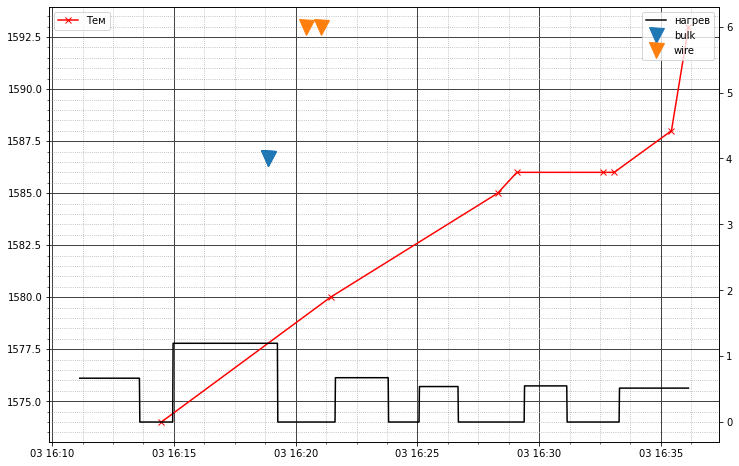



Основной задачей является создание и обучение модели, которая обеспечит прогнозирование конечной температуры выплавки на основании начальной температуры, даннх но нагреву(мощность и длительность) и данных по объему добавок в ходе процесса.

Исходные данные характеризуются нормальным раснпределением(см. диаграмм ниже), однако имеют выбросы и пропуски.

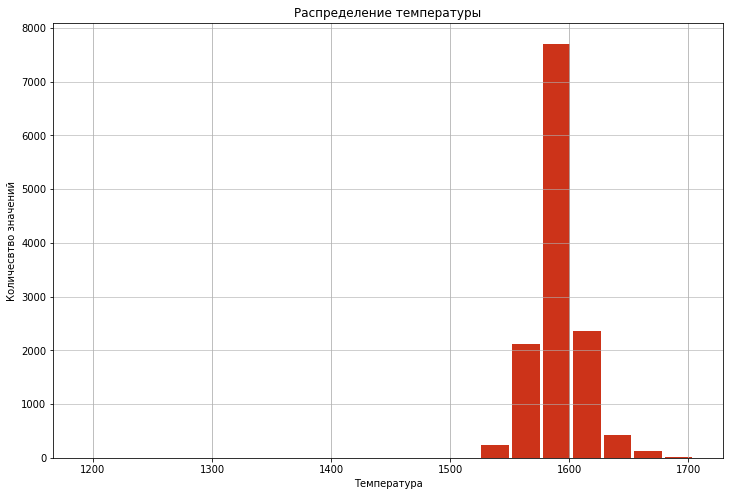

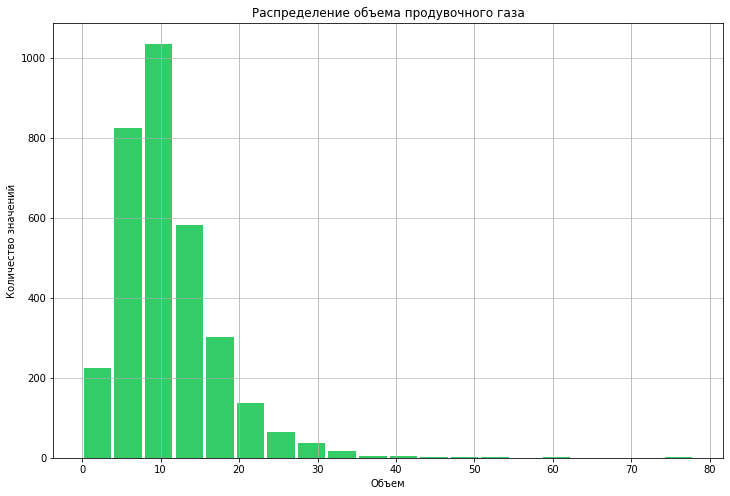

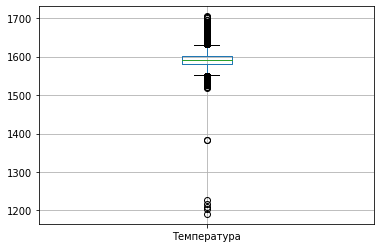

В данных присутствуют как выбросы, так и не по всем заготовкам они представлены в полном объеме. Для создания максимально корректных признаков необходима предобработка и подготовка данных, например вычисление полной мощности на электродах, удаление выбросов, мастшабирование.


Данные по параметрам нагрева с определенной долей условности представлены в виде временных рядов 

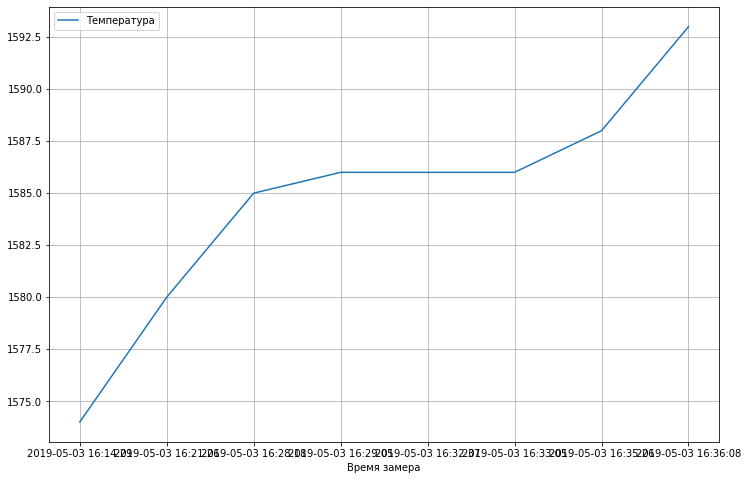

А данные по сыпучим, проволочным  материалам и газу представленным в виде таблиц


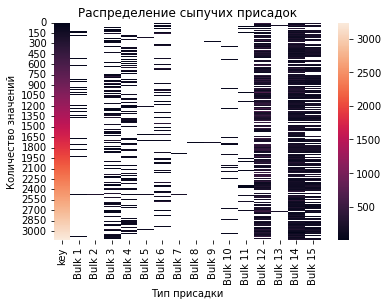

### 2 Подготовка данных

После удаления выбросов и пропущенных данных, были выбраны выплавки(good_keys)-2470 штуки, для которых имелось не менее двух значений температур.


Была проведена групировка данных по выплавкам, созданы новые признаки, такие как: время нагрева(heat_time), полная мощность('power'), количество энергии, которое пошло на каждую выплавку в кВт*ч (kwh)

Полная мощность - $S = \sqrt{A^2 + P^2}$

Для сыпучих и проволочных добавок были отобраны значения в части Bulk3,Bulk4,Bulk12, Bulk 14,Bulk 15, wire1,wire2, как регулярно встречающиеся в большинстве выплавок.


Было выполнено объединие все отобранных данных в единую таблицу по ключу 'key', то есть были собранны релевантные данных, характеризующие процесс каждой отобранной выплавки 

In [132]:
data

,heat_time,kwh,power,init_temp,final_temp,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
0,1098.0,400.660487,1.165279,1571.0,1613.0,29.749986,60.059998,0.00000,0.0,43.0,206.0,150.0,154.0
1,811.0,244.787101,0.912304,1581.0,1602.0,12.555561,96.052315,0.00000,0.0,73.0,206.0,149.0,154.0
2,655.0,145.851882,0.597907,1596.0,1599.0,28.554793,91.160157,0.00000,0.0,34.0,205.0,152.0,153.0
3,741.0,221.364253,0.953741,1601.0,1625.0,18.841219,89.063515,0.00000,0.0,81.0,207.0,153.0,154.0
4,869.0,333.093877,1.008939,1576.0,1602.0,5.413692,89.238236,9.11456,0.0,78.0,203.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,723.0,216.338398,0.996717,1570.0,1591.0,7.125735,89.150879,0.00000,21.0,0.0,256.0,129.0,223.0
2320,940.0,243.128172,0.842839,1554.0,1591.0,9.412616,114.179527,0.00000,0.0,63.0,256.0,129.0,226.0
2321,569.0,154.702875,0.961672,1571.0,1589.0,6.271699,94.086723,9.04800,0.0,85.0,230.0,124.0,226.0
2322,750.0,213.282721,0.828750,1591.0,1594.0,14.953657,118.110717,0.00000,90.0,0.0,206.0,129.0,207.0


Подготовим данные - криториальный параметр final_temp является целью прогноза  
features = data.drop(['final_temp'], axis = 1)   
target = data['final_temp']  

train_set_ft,test_set_ft,train_set_tg, test_set_tg = train_test_split(features,target, test_size=0.25, random_state = 16012023)



Размер обучающей выборки составил <b> 1743</b> выплавки, размер тестовой выборки составил <b>581</b> выплавку

### 3 Обучение моделей

В качестве метрики качества выбрана метрика  MAE(mean absolut error), она должна быть менее 6,8 С.

Перед обучением моделей, была проведена проверка на мультиколлениальность

In [140]:
data.corr()

,heat_time,kwh,power,init_temp,final_temp,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
heat_time,1.000000,0.900164,0.568196,-0.383939,0.277953,0.396207,0.055443,0.054460,0.091603,-0.029086,0.466002,0.461035,0.294538
kwh,0.900164,1.000000,0.729114,-0.416027,0.274535,0.318929,0.006195,0.015829,0.061889,-0.035913,0.479666,0.440723,0.308601
power,0.568196,0.729114,1.000000,-0.505129,0.190470,0.089535,-0.113451,-0.010184,0.036024,-0.043713,0.391922,0.340354,0.329482
init_temp,-0.383939,-0.416027,-0.505129,1.000000,0.301882,0.036736,0.262880,-0.101101,-0.113380,0.165484,-0.079574,-0.179991,-0.062382
final_temp,0.277953,0.274535,0.190470,0.301882,1.000000,0.059079,0.317488,-0.207242,-0.037156,0.187817,0.266805,0.114893,0.265772
Газ 1,0.396207,0.318929,0.089535,0.036736,0.059079,1.000000,0.118192,0.104653,0.059665,0.017532,0.216969,0.268284,0.043033
Wire 1,0.055443,0.006195,-0.113451,0.262880,0.317488,0.118192,1.000000,-0.069439,0.037788,0.298145,0.170812,-0.052654,0.119047
Wire 2,0.054460,0.015829,-0.010184,-0.101101,-0.207242,0.104653,-0.069439,1.000000,0.094897,-0.268115,-0.098208,0.037017,-0.096411
Bulk 3,0.091603,0.061889,0.036024,-0.113380,-0.037156,0.059665,0.037788,0.094897,1.000000,-0.295526,0.018059,0.011209,-0.013181
Bulk 4,-0.029086,-0.035913,-0.043713,0.165484,0.187817,0.017532,0.298145,-0.268115,-0.295526,1.000000,0.105190,-0.091103,0.100833


И выявлено, что для исключения мультиколлелярции стоит либо оставить что-то одно из трех - heat_time ,kwh либо power.  Было оставлен параметр kwh.

Очевидно, что перед задача представляет собой задачу регресии.
В ходе работы были проверены с помощью кросс-валидации следющие модели:  
- LinearRegression  
- DecisionTreeRegressor  
-  LGBMRegressor  
- RandomForestRegressor  
- GradientBoostingRegressor  

В результате онптимальной подготовки данных, все выбранные модели дают метрику МАЕ менее 6.8, наиболее точными моделями на этапе валидации являются <b>GradientBoostingRegressor(МАЕ 6.5) </b> и <b>RandomForestRegressor(МАЕ 6.45)</b> 

### 4 Финальная проверка на тестовой выборке

На тестовой выборке лучшее значение метрики показала модель GradientBoostingRegressor с MAE = 6.22

Сравнение с константной моделью показала, что последняя хуже дает прогнозы хуже на  1.75 C, чем выбранная GradientBoostingRegressor 

# IV Заключение (Q/A part)

    Q.Какие пункты плана были выполнены, а какие — нет. Почему?
  

A. Все пункты плана были выполнена, кроме масштабирование признаков. Это не потребовалось, так как удалось достигнуть требуемую метрику без этой трансформации,значения признаков были в пределах двух порядков.

 
    Q.Какие трудности возникли и как вы их преодолели?
 

А. Первая трудность была связана осознанием набора данных и физики процесса. Решением этого вопроса стала визуализации процесса выплавки во времени.
Вторая трудность заключалась в достижении требуемой метрики качества, решением стало проверка объединения признаков и обнаружение ошибки, что в итоговой таблице часть признаков была сдвинута относително ключа(номера выплавки)


    Q.Какие ключевые шаги в решении задачи вы выделили?


A. Все шаги выделены в плане и видны по ходу документа, в целом это:  
- Входной исследовательский анализ данных
- Выбор релеватных данных
- Подоготовка дополнительных параметров
- Создание единой таблицы с данными
- Проверка признаков на мультиколлениарность
- Кроссвалидация моделей
- Проверка на тестовой выборке выбранной модели и сравнение с константной моделью


    Q.Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?



A. Признаки представлены в таблице ниже

In [147]:
features

,kwh,init_temp,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
0,400.660487,1571.0,29.749986,60.059998,0.00000,0.0,43.0,206.0,150.0,154.0
1,244.787101,1581.0,12.555561,96.052315,0.00000,0.0,73.0,206.0,149.0,154.0
2,145.851882,1596.0,28.554793,91.160157,0.00000,0.0,34.0,205.0,152.0,153.0
3,221.364253,1601.0,18.841219,89.063515,0.00000,0.0,81.0,207.0,153.0,154.0
4,333.093877,1576.0,5.413692,89.238236,9.11456,0.0,78.0,203.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...
2319,216.338398,1570.0,7.125735,89.150879,0.00000,21.0,0.0,256.0,129.0,223.0
2320,243.128172,1554.0,9.412616,114.179527,0.00000,0.0,63.0,256.0,129.0,226.0
2321,154.702875,1571.0,6.271699,94.086723,9.04800,0.0,85.0,230.0,124.0,226.0
2322,213.282721,1591.0,14.953657,118.110717,0.00000,90.0,0.0,206.0,129.0,207.0


В предобработку вошли:  
- Удаление выбросов
- выбор только тех выплавок, по которых было представлено не менее двух температур
- Группировка с вычислением суммы и среднего значения
- Создание своего признака - количества энергии, переданного за процесс выплавки

   
    Q.Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

A. На тестовой выборке лучшее значение метрики показала модель GradientBoostingRegressor с MAE = 6.22 гиперпараметры- max_depth=3, n_estimators=150,